# Cell 1 – Project Introduction

Project: Mock LLM-Powered Tabular Query Assistant

This notebook simulates how a real LLM would convert natural language
questions into pandas code, but without using an API.

Instead, we use a pre-written prompt map dictionary to simulate the behavior
of an assistant. All execution is local, and visualizations are saved
to ../outputs/.

Author: lexusimni



In [16]:
# Cell 2 – Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import uuid


In [17]:
# Cell 3 – Load Superstore data
df = pd.read_csv("../data/train.csv")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
# Cell 4 – Load simulated LLM prompt-to-code mappings from JSON file
import json

prompt_file_path = "../prompts/prompt_map.json"

try:
    with open(prompt_file_path, "r") as f:
        prompt_map = json.load(f)
    print(f"✅ Loaded {len(prompt_map)} prompts from: {prompt_file_path}")
except FileNotFoundError:
    print(f"❌ File not found: {prompt_file_path}")
    prompt_map = {}


✅ Loaded 6 prompts from: ../prompts/prompt_map.json


In [19]:
# Cell 5 – Execute code safely and save to existing ../outputs/ folder
import uuid

def run_generated_code(code):
    blocked = ["import", "os", "sys", "__", "eval", "exec", "open", "del"]
    if any(b in code for b in blocked):
        print("❌ Blocked keyword detected in code.")
        return

    try:
        local_vars = {'df': df, 'pd': pd, 'plt': plt}
        exec(code, {}, local_vars)

        # Save plot BEFORE plt.show()
        if plt.get_fignums():
            filename = f"../outputs/plot_{uuid.uuid4().hex[:8]}.png"
            plt.savefig(filename, bbox_inches="tight")
            print(f"🖼️ Plot saved as: {filename}")
            plt.show()
        else:
            print("✅ Code executed, but no plot was created.")

    except Exception as e:
        print("❌ Error while executing code:", e)


🧠 Simulated LLM Response:
mode_sales = df.groupby('Ship Mode')['Sales'].sum()
mode_sales.plot.pie(autopct='%1.1f%%', startangle=90, title='Sales by Ship Mode')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../outputs/plot_sales_by_ship_mode.png", bbox_inches="tight")
plt.show()


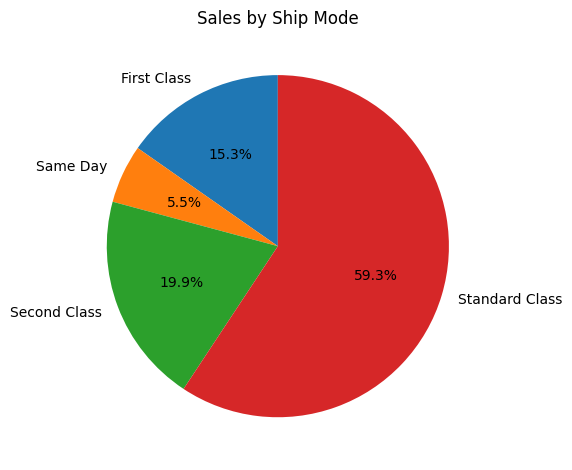

✅ Code executed, but no plot was created.


In [20]:
# Cell 6 – Ask a question and simulate LLM
question = input("💬 Ask a tabular question: ").strip().lower()

if question in prompt_map:
    print("🧠 Simulated LLM Response:")
    print("="*60)
    print(prompt_map[question])
    print("="*60)
    run_generated_code(prompt_map[question])
else:
    print("❌ Sorry, that question isn't recognized in this simulation.")
    print("📝 Try one of the following:")
    for q in prompt_map:
        print("  -", q)
